# Part I - Prosper Loan Data Exploration
## by Nwachi Joshua

## Introduction
> This data set includes 113,937 loans, each with 81 parameters such as loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower job status, borrower credit history, and the most recent payment information.



## Preliminary Wrangling


In [400]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [401]:
#read the dataset into loan dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

## Assessing the dataset


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [403]:
df.shape

(113937, 81)

In [404]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [405]:
sum(df['ListingKey'].isna())

0

In [406]:
#Check for duplicate listing keys
df['ListingKey'].duplicated().sum()

871

### Quality issues

1. Listing keys have duplicates

2. ListingCreationDate,LoanOriginationDate and ClosedDate columns are not in date time format

3. NaN values are strings instead of nulls

4. Proper score column has values above 10

5. concatenate the ProsperRating (Alpha) & ProsperRating (numeric) column and convert the resulting column to categorical

6. Replace the numerical values in the ListingCategory column


## Data Cleaning


In [407]:
#make a copy of the dataframe
df_copy=df.copy()

In [408]:
#drop duplicates on the ListingKey column and keep first occurance
df_copy = df_copy.drop_duplicates(subset='ListingKey', keep='first')

In [409]:
#check to see if its done
df_copy.duplicated().sum()

0

In [410]:
#create a function to convert columns to date time 
def convert_to_datetime(column_name):
    df_copy[column_name] = pd.to_datetime(df_copy[column_name])
   

In [411]:
#convert columns to date time
convert_to_datetime('ListingCreationDate')
convert_to_datetime('LoanOriginationDate')
convert_to_datetime('ClosedDate')

In [412]:
#check to see if its done
columns = ['ListingCreationDate', 'LoanOriginationDate', 'ClosedDate']
df_copy[columns].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  113066 non-null  datetime64[ns]
 1   LoanOriginationDate  113066 non-null  datetime64[ns]
 2   ClosedDate           55076 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 3.5 MB


In [413]:
# replace all instances of 'NaN' with np.NaN.
df_copy = df_copy.replace({'NaN': np.NaN})

In [414]:
#check to see if its done
if (df_copy == 'NaN').any().any():
    print("The replacement was not successful.")
else:
    print("All 'NaN' values were successfully replaced with np.NaN.")

All 'NaN' values were successfully replaced with np.NaN.


In [415]:
#Replace the 11 values with NaN
df_copy['ProsperScore'] = df_copy['ProsperScore'].replace(11, np.nan)

In [416]:
#check to see if its done
df_copy['ProsperScore'].value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
1.0       946
Name: ProsperScore, dtype: int64

In [417]:
#Concatenate the 'ProsperRating (Alpha)' & 'ProsperRating (numeric)' column together to form a new column
df_copy['ProsperRating'] =  df_copy['ProsperRating (numeric)'].astype(str)+ " - " +df_copy['ProsperRating (Alpha)']

#Change the 'ProsperRating' column to  categorical 
rank = ['1.0 - HR', '2.0 - E', '3.0 - D', '4.0 - C', '5.0 - B', '6.0 - A', '7.0 - AA']

ratings = pd.api.types.CategoricalDtype(ordered = True, categories = rank)

df_copy['ProsperRating'] = df_copy['ProsperRating'].astype(ratings)

In [418]:
#check to see if its done
df_copy['ProsperRating']

0             NaN
1         6.0 - A
2             NaN
3         6.0 - A
4         3.0 - D
           ...   
113932    4.0 - C
113933    6.0 - A
113934    3.0 - D
113935    4.0 - C
113936    6.0 - A
Name: ProsperRating, Length: 113066, dtype: category
Categories (7, object): ['1.0 - HR' < '2.0 - E' < '3.0 - D' < '4.0 - C' < '5.0 - B' < '6.0 - A' < '7.0 - AA']

In [419]:
#We cut the Risk scores into levels with 10-Lowest risk level and 1-Highest risk level
risk_edges = [1, 2.5, 5.0, 7.5, 10]
risk_labels = ['High', 'Medium high', 'Medium', 'Low']

df_copy['ProsperRiskLevel'] = pd.cut(df_copy['ProsperScore'], risk_edges, labels = risk_labels)

In [420]:
# Create a function that will replace the values with a text
def replace_numerical_with_text(df, column_name, value_dict):
    df[column_name].replace(value_dict, inplace=True)

In [421]:
#Replace the values in the ListingCategory column
value_dict = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 
              5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
              11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
              15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

replace_numerical_with_text(df_copy, 'ListingCategory (numeric)', value_dict)


In [422]:
#check to see if its done
df_copy['ListingCategory (numeric)'].value_counts()

Debt Consolidation    57624
Not Available         16965
Other                 10448
Home Improvement       7388
Business               7157
Auto                   2568
Personal Loan          2395
Household Expenses     1987
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           762
Student Use             756
Motorcycle              304
Engagement Ring         214
Baby&Adoption           196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [423]:
df_copy.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [424]:
cols = ["ListingCategory","LoanOriginalAmount","Term","CreditScoreRangeLower","LoanOriginationQuarter", "LoanStatus","LoanOriginationDate", "BorrowerAPR", "BorrowerRate", "LenderYield", "EstimatedEffectiveYield", "CreditScoreRangeLower", "CreditScoreRangeUpper", "IsBorrowerHomeowner", "EmploymentStatus", "Occupation", "DebtToIncomeRatio", "InquiriesLast6Months", "CurrentDelinquencies", "ProsperRating", "IncomeRange", "EmploymentStatusDuration","ProsperRating (numeric)","ProsperRiskLevel","IncomeVerifiable","AvailableBankcardCredit","MonthlyLoanPayment","StatedMonthlyIncome"]
df_sub=df_copy[cols]

### What is the structure of your dataset?

There are 113,937 loans in the dataset, with 81 variables (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus, and many more).


### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are loan performance, financial variables, and demographic variables.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support the investigation into these features, the following columns can be used:<br>
'ListingCategory', 'LoanOriginalAmount', 'Term', 'LoanOriginationQuarter', 'LoanStatus','LoanOriginationDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedEffectiveYield', 'CreditScoreRangeLower','CreditScoreRangeUpper', 'IsBorrowerHomeowner', 'EmploymentStatus', 'DebtToIncomeRatio', 'ProsperRating', 'IncomeRange', 'ProsperRating (numeric)','ProsperRiskLevel', 'IncomeVerifiable','MonthlyLoanPayment', 'StatedMonthlyIncome'.<br>
These columns will help analyze the distribution of borrower APR, borrower rate, lender yield, and estimated effective yield, the impact of homeownership on loan performance, the distribution of loan amount and loan origination date, the distribution of the loan terms and loan origination date, the relationship between employment status and loan performance, the impact of the debt-to-income ratio on loan performance, the relationship between the Prosper rating and loan performance etc.

## Univariate Exploration

For this section i will be asking the following questions:<br>
(1).What is the distribution of borrower APR, borrower rate, lender yield, and estimated effective yield?<br>
(2).How does homeownership impact loan performance?<br>
(3).What is the distribution of loan amount and loan origination date?<br>
(4).What is the distribution of the loan terms ?<br>

In [425]:
df_sub.columns

Index(['ListingCategory', 'LoanOriginalAmount', 'Term',
       'CreditScoreRangeLower', 'LoanOriginationQuarter', 'LoanStatus',
       'LoanOriginationDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'IsBorrowerHomeowner', 'EmploymentStatus',
       'Occupation', 'DebtToIncomeRatio', 'InquiriesLast6Months',
       'CurrentDelinquencies', 'ProsperRating', 'IncomeRange',
       'EmploymentStatusDuration', 'ProsperRating (numeric)',
       'ProsperRiskLevel', 'IncomeVerifiable', 'AvailableBankcardCredit',
       'MonthlyLoanPayment', 'StatedMonthlyIncome'],
      dtype='object')

In [426]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingCategory           113066 non-null  object        
 1   LoanOriginalAmount        113066 non-null  int64         
 2   Term                      113066 non-null  int64         
 3   CreditScoreRangeLower     112475 non-null  float64       
 4   LoanOriginationQuarter    113066 non-null  object        
 5   LoanStatus                113066 non-null  object        
 6   LoanOriginationDate       113066 non-null  datetime64[ns]
 7   BorrowerAPR               113041 non-null  float64       
 8   BorrowerRate              113066 non-null  float64       
 9   LenderYield               113066 non-null  float64       
 10  EstimatedEffectiveYield   83982 non-null   float64       
 11  CreditScoreRangeLower     112475 non-null  float64       
 12  Cr

### (1).What is the distribution of borrower APR, borrower rate, lender yield, and estimated effective yield?

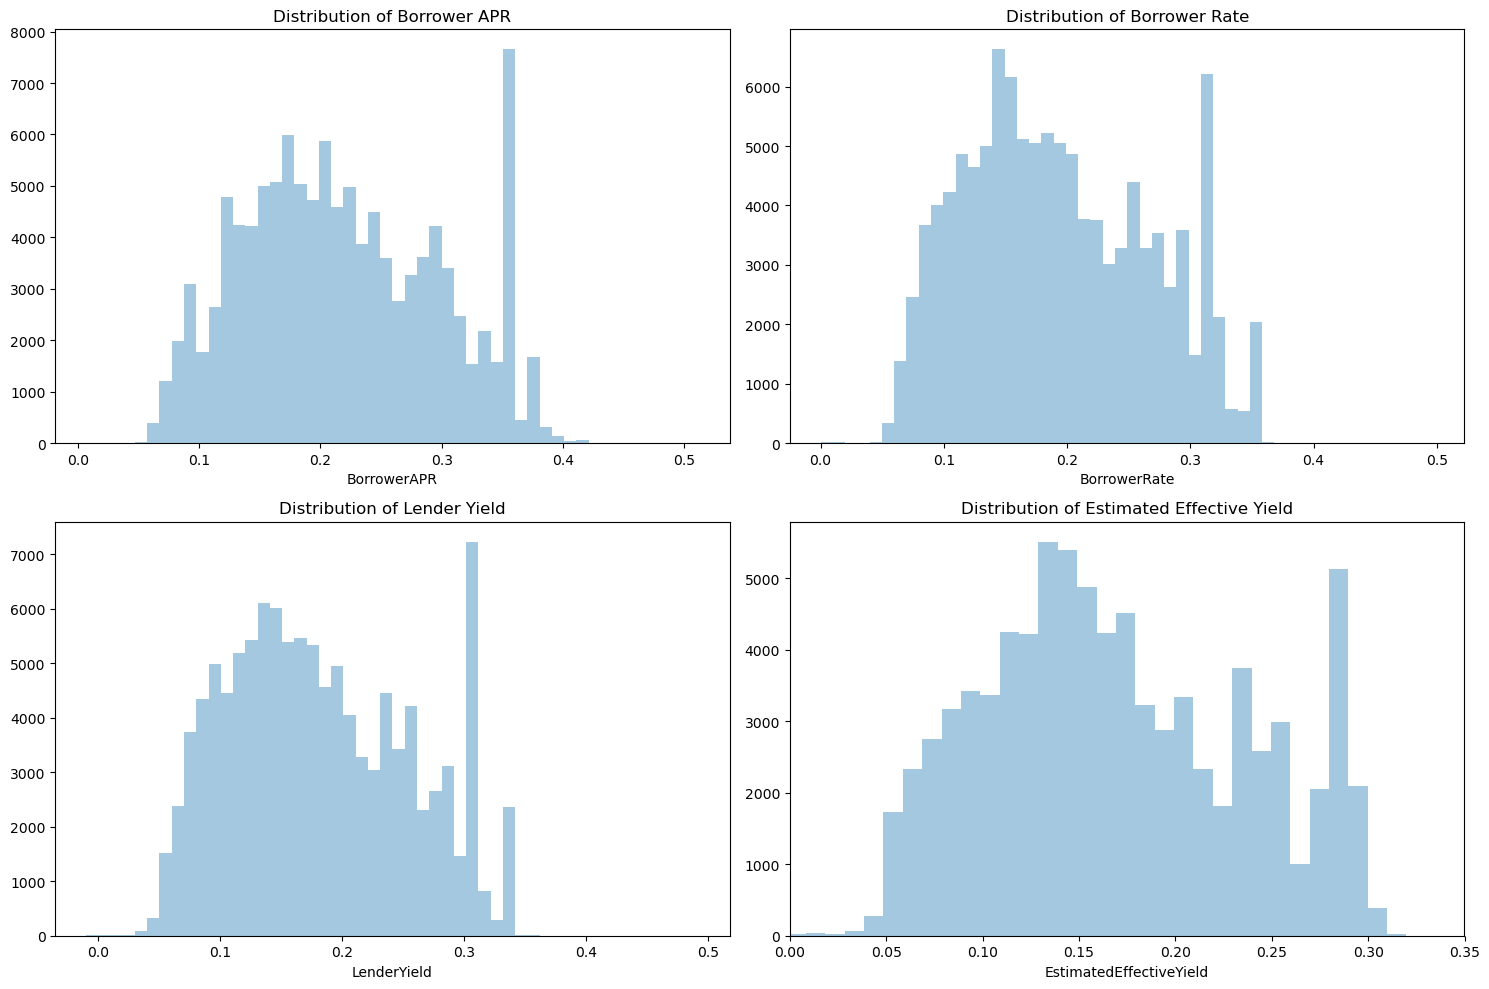

In [427]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Plot the distribution of borrower APR
sns.distplot(df_sub[df_sub['BorrowerAPR'].notnull()]['BorrowerAPR'], ax=ax[0, 0], kde=False)
ax[0, 0].set_title('Distribution of Borrower APR')

# Plot the distribution of borrower rate
sns.distplot(df_sub['BorrowerRate'], ax=ax[0, 1], kde=False)
ax[0, 1].set_title('Distribution of Borrower Rate')

# Plot the distribution of lender yield
sns.distplot(df_sub['LenderYield'], ax=ax[1, 0], kde=False)
ax[1, 0].set_title('Distribution of Lender Yield')


# Plot the distribution of estimated effective yield
sns.distplot(df_sub[df_sub['EstimatedEffectiveYield'].notnull()]['EstimatedEffectiveYield'], ax=ax[1, 1], kde=False)
ax[1, 1].set_title('Distribution of Estimated Effective Yield')
plt.xlim(0,0.35)

# Show the plot
plt.tight_layout()
plt.show()

### Observation

The distribution of borrower APR, borrower rate, estimated effective yield and lender yield seems to have a symmetical shape with borrower APR, borrower rate and lender yield having  a spike between 3.0-4.0 range

### (2).How does homeownership impact loan performance?

In [428]:

# Create a new loan status  column categoring  with simpler categories
df_sub['New_loan_status'] = df_sub['LoanStatus'].replace({
    'Current': 'Active',
    'Completed': 'Completed',
    'Chargedoff': 'Defaulted',
    'Defaulted': 'Defaulted',
    'Past Due (1-15 days)': 'Past Due',
    'Past Due (16-30 days)': 'Past Due',
    'Past Due (31-60 days)': 'Past Due',
    'Past Due (61-90 days)': 'Past Due',
    'Past Due (91-120 days)': 'Past Due',
    'Past Due (>120 days)': 'Past Due',
    'FinalPaymentInProgress': 'Completed',
    'Cancelled': 'Cancelled'
})



In [429]:
df_sub['New_loan_status'].value_counts()

Active       55730
Completed    38264
Defaulted    17010
Past Due      2057
Cancelled        5
Name: New_loan_status, dtype: int64

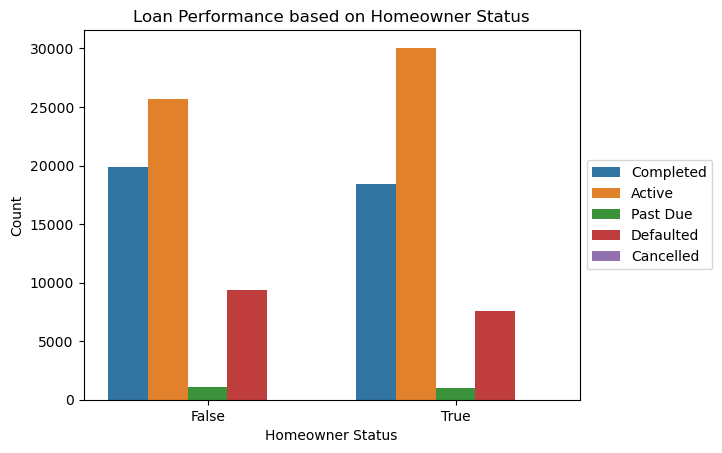

In [430]:

# filter out the missing values for homeowner status
sample = df_sub[df_sub['IsBorrowerHomeowner'].notnull()]

# create the plot
sns.countplot(x='IsBorrowerHomeowner', data=sample, hue='New_loan_status')

# add labels and title
plt.xlabel('Homeowner Status')
plt.ylabel('Count')
plt.title('Loan Performance based on Homeowner Status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# show plot
plt.show()


### Observation

Based on the bar plot of loan status by homeownership status, it appears that the most common loan status for both homeowners and non-homeowners is "Active", followed by "Completed". There is also a higher number of "Defaulted" loans for non-homeowners as compared to homeowners. The lowest loan status for both groups is "Past Due". This suggests that homeownership status may have an impact on loan performance.

### (3).What is the distribution of loan amount and loan origination date?

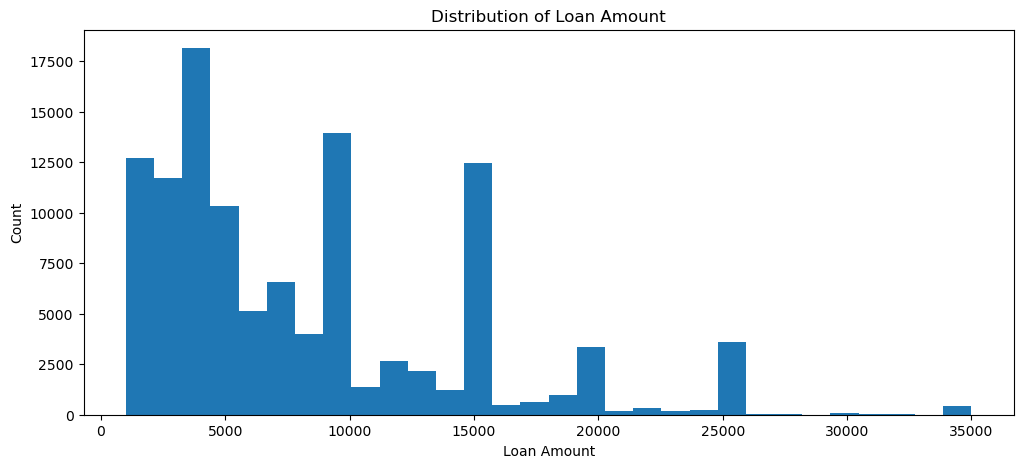

In [431]:

# Plot distribution of loan amount
plt.figure(figsize=(12,5))
plt.hist(df_sub['LoanOriginalAmount'], bins=30, color=sns.color_palette()[0])
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()



In [432]:
#extrating month and year from the LoanOriginationDate column
df_sub['month']=pd.DatetimeIndex(df_sub['LoanOriginationDate']).month
df_sub['year']=pd.DatetimeIndex(df_sub['LoanOriginationDate']).year

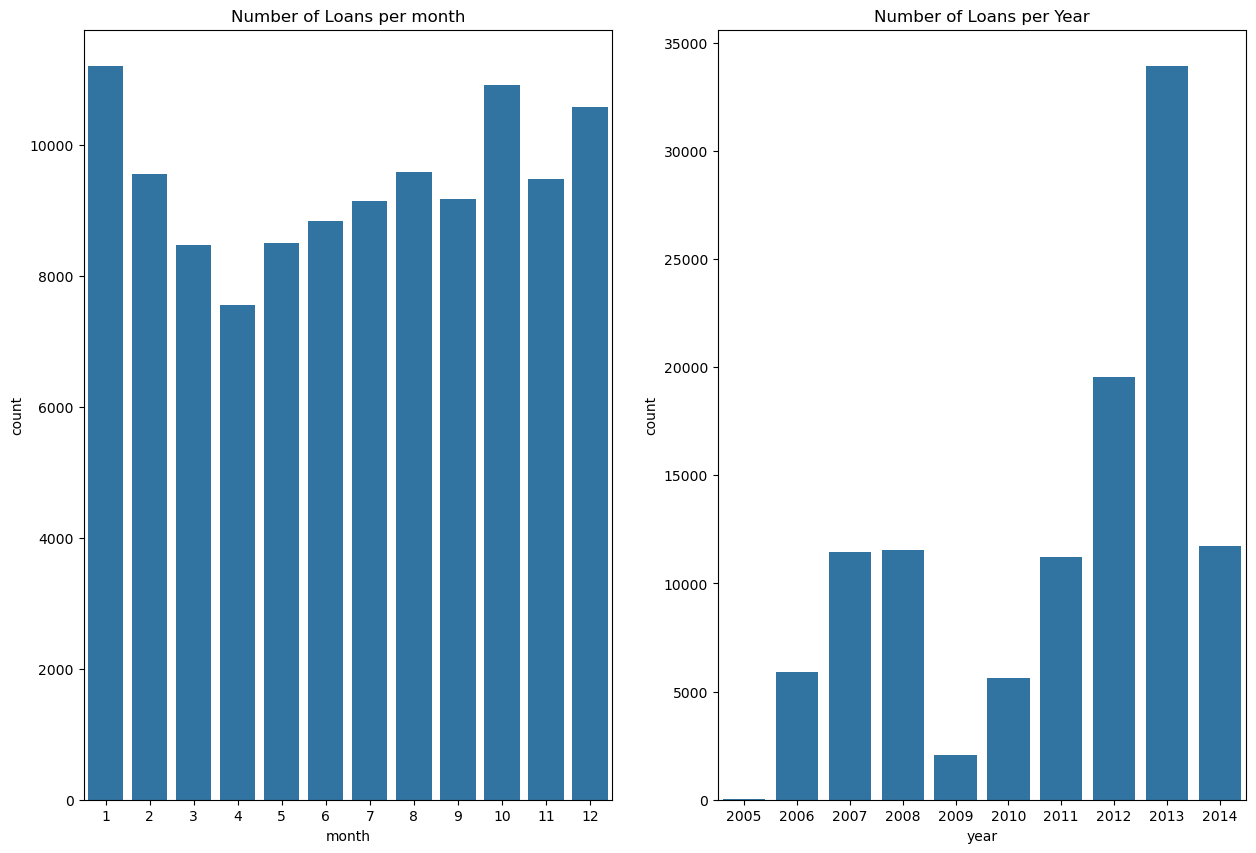

In [433]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

color_pal = sns.color_palette()[0]

sns.countplot(data= df_sub, x= 'month', color = color_pal,ax=ax[0])
ax[0].set_title('Number of Loans per month')
sns.countplot(data= df_sub, x= 'year', color = color_pal,ax=ax[1])
ax[1].set_title('Number of Loans per Year');


### Observation

Based on the histograms , the Loan Amount is right-skewed and it also shows that most loan amounts are between 1000-5000 , for the LoanOriginationDate bar chart seems to have the highest loan listings. <br>
Based on the bar chart ,the most popular months for loans are January,October and december








### (4).What is the distribution of the loan terms ?

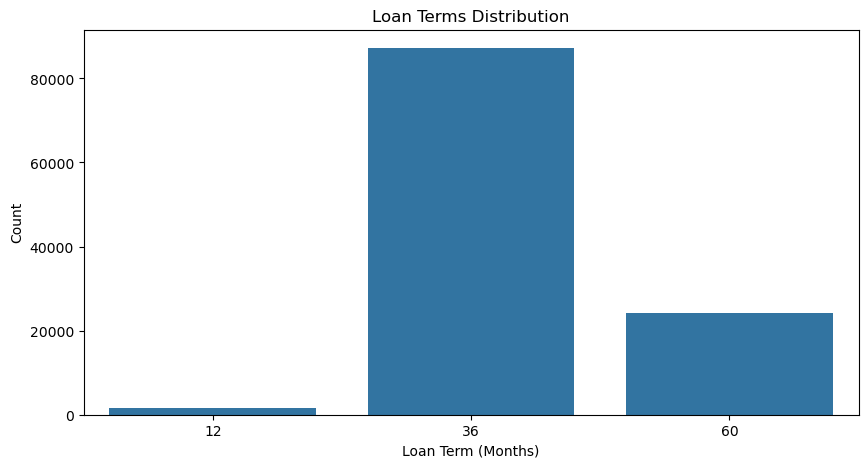

In [434]:
plt.figure(figsize=(10,5))
sns.countplot(x="Term", data=df_sub, color=sns.color_palette()[0])
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.title("Loan Terms Distribution")
plt.show()



### Observation

Most loans are for a period of 36 months

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of borrower APR, borrower rate, lender yield, and estimated effective yield have a symmetrical shape, with the majority of the data points centered around the 3.0-4.0 range.

Homeownership seems to impact loan performance as the most common loan status for both homeowners and non-homeowners is "Active". However, there is a higher number of "Defaulted" loans for non-homeowners compared to homeowners.

The loan amount is right-skewed, with most loan amounts being between 1000-5000. The loan origination date histogram shows that most loans were originated between 2013-2014, with 2013 having the highest number of loans. Furthermore, the bar chart shows that the most popular months for loan origination are January, October, and December.

The majority of the loans are for a term of 36 months, as shown in the loan term bar chart. No unusual points were observed in the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I pulled the loan's months and years from the loan's original date and noticed that many loans were taken out in 2013.
I also had to group similar loan statuses together in order to make the plot more readable

## Bivariate Exploration
For this section i will be asking the following questions:<br>
(1).What is the correlation between all of the numerical variables in the dataframe?<br>
(2).Does the income range have an impact on the borrower APR, borrower rate, or debt-to-income ratio?<br>
(3).How does the Prosper risk level impact the loan original amount or monthly loan payment?<br>
(4).How does the loan original amount relate to the monthly loan payment and stated monthly income?<br>
(5). Is there a relationship between the listing category and lender yield or monthly loan payment?<br>
(6).What is the trend in the average loan original amount over time?<br>
(7).How does the loan original amount vary based on the verified income status of the borrower?<br>
(8).How does the homeowner status, employment status, and Prosper rating vary based on income range and loan term/Prosper risk level?

In [435]:
order = [12, 36, 60]

terms = pd.api.types.CategoricalDtype(ordered = True, categories = order)

df_sub['Term'] = df_sub['Term'].astype(terms)
df_sub['Term'].unique()


[36, 60, 12]
Categories (3, int64): [12 < 36 < 60]

In [436]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingCategory           113066 non-null  object        
 1   LoanOriginalAmount        113066 non-null  int64         
 2   Term                      113066 non-null  category      
 3   CreditScoreRangeLower     112475 non-null  float64       
 4   LoanOriginationQuarter    113066 non-null  object        
 5   LoanStatus                113066 non-null  object        
 6   LoanOriginationDate       113066 non-null  datetime64[ns]
 7   BorrowerAPR               113041 non-null  float64       
 8   BorrowerRate              113066 non-null  float64       
 9   LenderYield               113066 non-null  float64       
 10  EstimatedEffectiveYield   83982 non-null   float64       
 11  CreditScoreRangeLower     112475 non-null  float64       
 12  Cr

### (1).What is the correlation between all of the numerical variables in the dataframe?

In [437]:

numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'DebtToIncomeRatio',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AvailableBankcardCredit',
               'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome','EstimatedEffectiveYield']

categorical_vars = ['Term','ProsperRiskLevel', 'ProsperRating', 'IsBorrowerHomeowner', 'IncomeRange','ListingCategory','LoanOriginationQuarter','LoanStatus','EmploymentStatus']

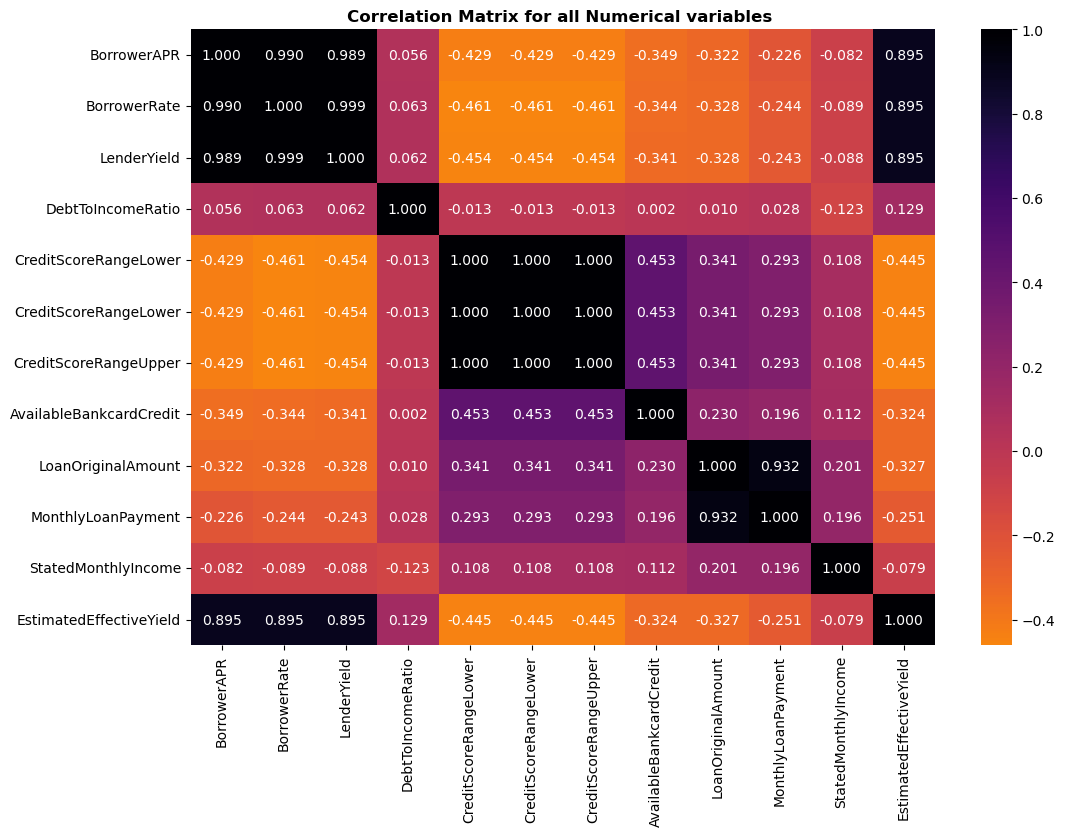

In [438]:
# correlation plot
plt.figure(figsize = [12, 8])
sns.heatmap(df_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'inferno_r', center = 0)
plt.title('Correlation Matrix for all Numerical variables ', fontweight = 'bold')
plt.show()

### Observation

For both credit score groups, the correlation between borrowerAPR and borrowerrate is negative (higher & lower). This explains why borrowers with higher credit scores are eligible for lower APRs and interest rates.<br>
The LoanOriginalAmount and BorrowerAPR have a negative correlation. This means that the smaller the loan, the higher the interest rate, and the larger the loan, the lower the interest rate.<br>
Borrower Rate and Borrower APR have a high correaltion indicating the higher the interest rate of the loan the higher the annual percentage rate for that loan. 

### (2).Does the income range have an impact on the borrower APR, borrower rate, or debt-to-income ratio?

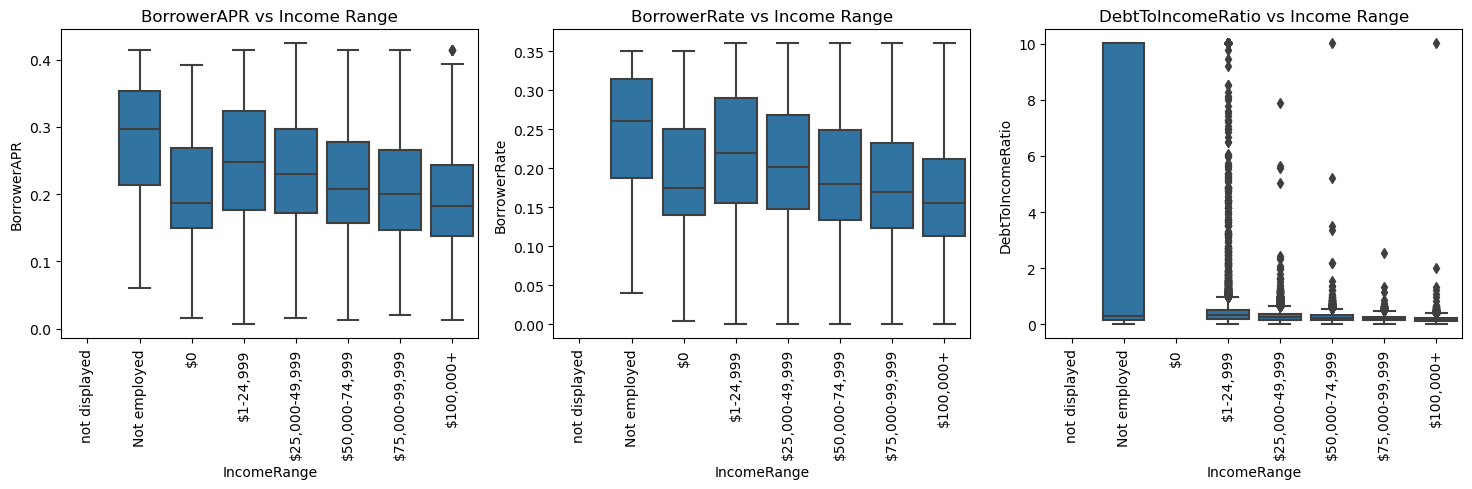

In [439]:


# Create box plots to visualize the relationship between income range and the target variables
plt.figure(figsize=(15,5))
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']

plt.subplot(1,3,1)
sns.boxplot(x='IncomeRange', y='BorrowerAPR', data=df_sub,order=order,color=sns.color_palette()[0])
plt.title('BorrowerAPR vs Income Range')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(x='IncomeRange', y='BorrowerRate', data=df_sub,order=order,color=sns.color_palette()[0])
plt.title('BorrowerRate vs Income Range')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(x='IncomeRange', y='DebtToIncomeRatio', data=df_sub,order=order,color=sns.color_palette()[0])
plt.title('DebtToIncomeRatio vs Income Range')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


### Observation

The visualizations for BorrowerAPR, BorrowerRate, and DebtToIncomeRatio against Income Range indicate a clear correlation between the borrower's income and borrowing cost or their ability to repay the loan. As the income of the borrower increases, the annual percentage rate (BorrowerAPR) and the borrower rate decrease, and the debt-to-income ratio improves. This trend supports the idea that a higher income can result in lower borrowing costs and improved loan repayment prospects for the borrower.

### (3).How does the Prosper risk level impact the loan original amount or monthly loan payment?

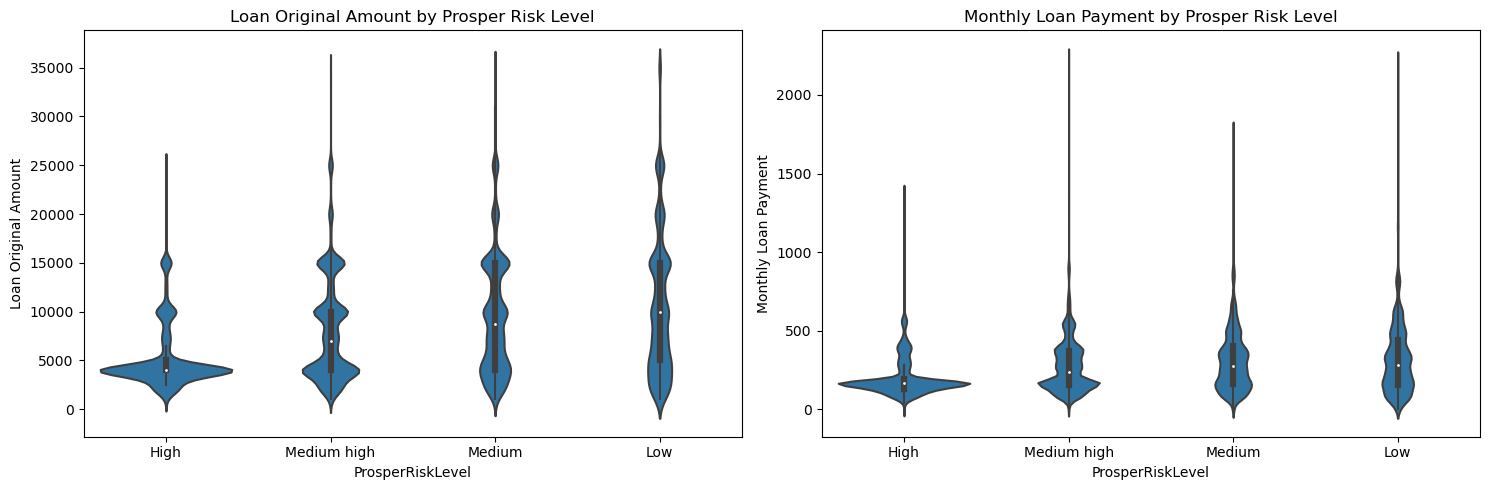

In [440]:


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=df_sub,y='LoanOriginalAmount', x='ProsperRiskLevel',color=sns.color_palette()[0])
plt.title("Loan Original Amount by Prosper Risk Level")
plt.ylabel("Loan Original Amount")

plt.subplot(1, 2, 2)
sns.violinplot(data=df_sub,y='MonthlyLoanPayment', x='ProsperRiskLevel',color=sns.color_palette()[0])
plt.title("Monthly Loan Payment by Prosper Risk Level")
plt.ylabel("Monthly Loan Payment")

plt.tight_layout()


plt.show()


### Observation

Observed from the violin plots, the Prosper Risk Level appears to impact the Loan Original Amount and Monthly Loan Payment. Borrowers with high risk levels tend to take loans in the $1,000 to $5,000 range and make low monthly payments. As risk levels reduce, the frequency of borrowing from this range decreases and monthly payments increase 

### (4). How does the loan original amount relate to the monthly loan payment and stated monthly income?

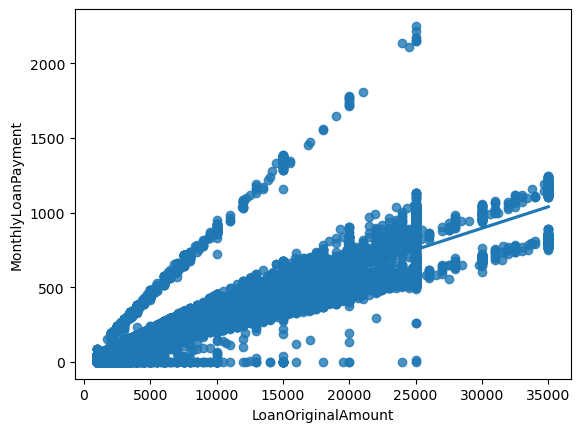

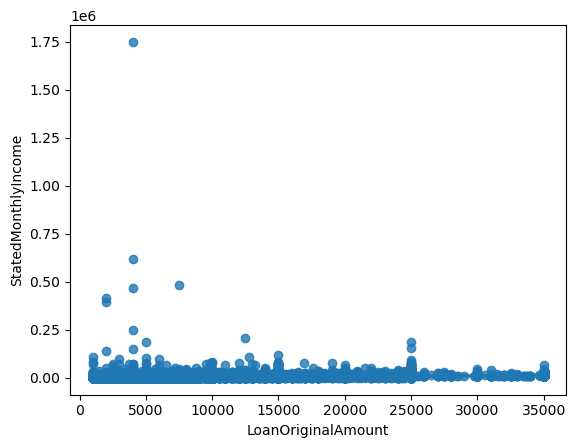

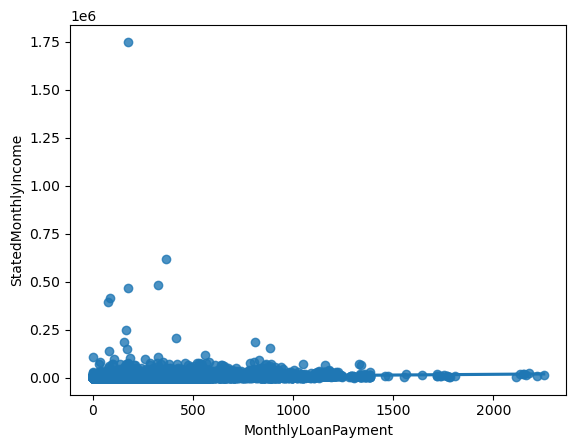

In [441]:


sns.regplot(x='LoanOriginalAmount', y='MonthlyLoanPayment', data=df_sub,color=sns.color_palette()[0])
plt.show()

sns.regplot(x='LoanOriginalAmount', y='StatedMonthlyIncome', data=df_sub,color=sns.color_palette()[0])
plt.show()

sns.regplot(x='MonthlyLoanPayment', y='StatedMonthlyIncome', data=df_sub,color=sns.color_palette()[0])
plt.show()


### Observation

Based on the analysis of the data, there appears to be a strong relationship between the Loan Original Amount and the Monthly Loan Payment, as indicated by a high correlation between these two variables. However, there is little to no correlation between the Loan Original Amount and the Stated Monthly Income, or between the Monthly Loan Payment and the Stated Monthly Income. This suggests that the Loan Original Amount has a direct impact on the Monthly Loan Payment, but may not necessarily be related to the borrower's stated monthly income.

### (5). Is there a relationship between the listing category and lender yield or monthly loan payment?

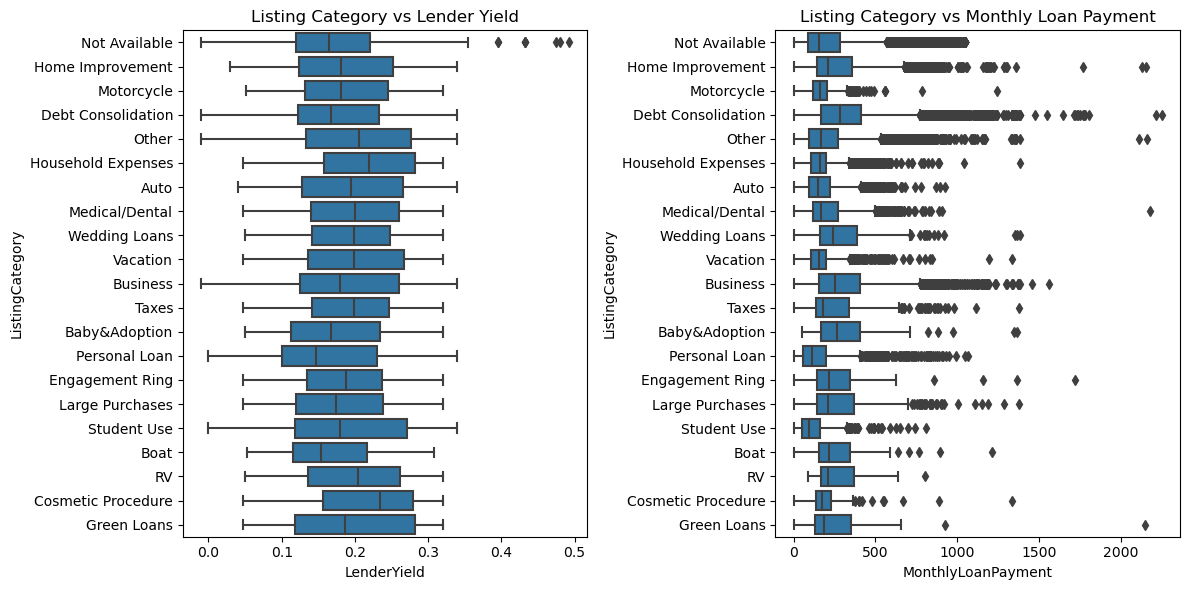

In [442]:
plt.figure(figsize = [12, 6])

# subplot 1: Listing Category vs Lender Yield
plt.subplot(1, 2, 1)
sns.boxplot(x = 'LenderYield', y ='ListingCategory' , data = df_sub,color=sns.color_palette()[0])
plt.title('Listing Category vs Lender Yield')


# subplot 2: Listing Category vs Monthly Loan Payment
plt.subplot(1, 2, 2)
sns.boxplot(x = 'MonthlyLoanPayment', y = 'ListingCategory', data = df_sub,color=sns.color_palette()[0])
plt.title('Listing Category vs Monthly Loan Payment')

plt.tight_layout()


### Observation

This suggests that there may be a relationship between the listing category and lender yield or monthly loan payment, where certain categories like business, debt consolidation, and large purchases result in lower lender yield and monthly loan payments.

### (6). What is the trend in the average loan original amount over time?

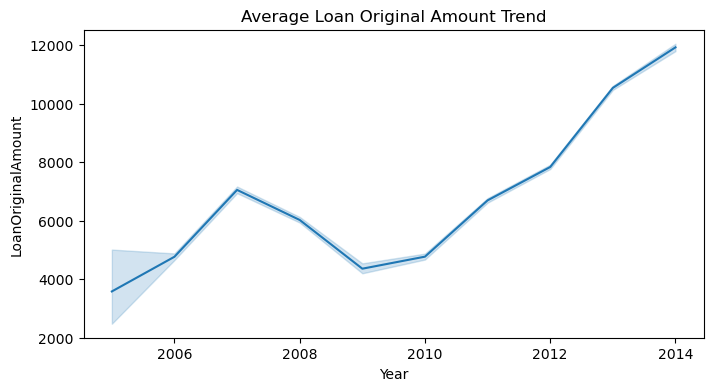

In [443]:
plt.figure(figsize = [8, 4])

sns.lineplot(data = df_sub, x ='year' , y = 'LoanOriginalAmount')

plt.xlabel('Year')
plt.title('Average Loan Original Amount Trend')
plt.show()

### Observation

The trend of the average loan original amount over time shows a general upward trend with a slight dip observed in the period between 2008-2009. This may suggest a correlation with economic recessions during that time period.

### (7). How does the loan original amount vary based on the verified income status of the borrower?

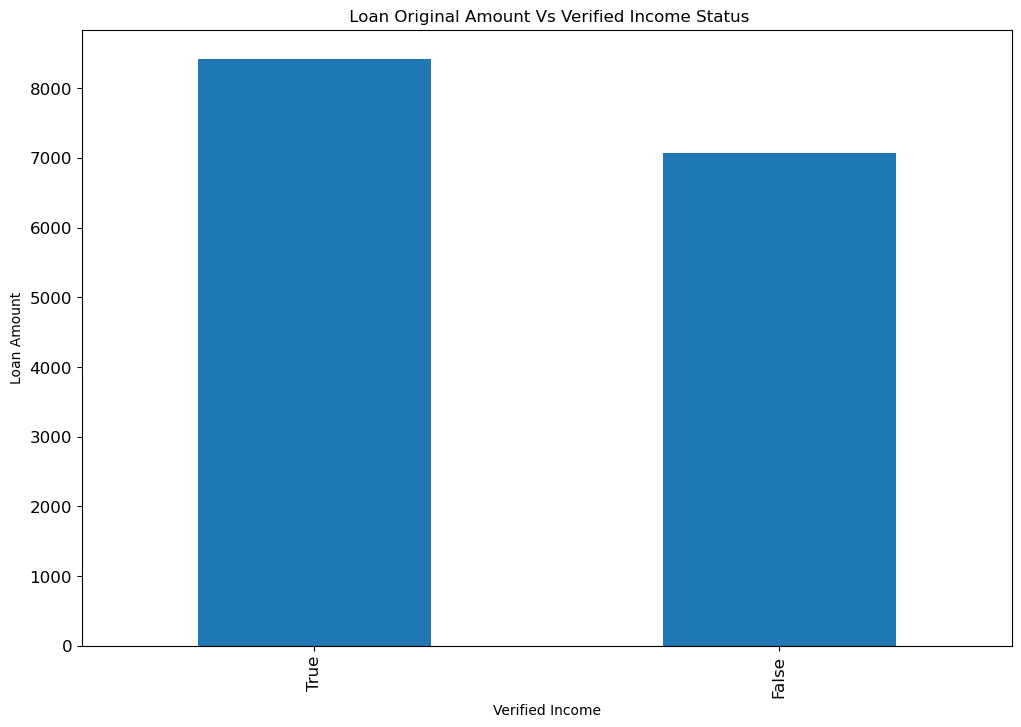

In [444]:
# looking at relationship between borrowers loan original amount and their verifiable income status 
a= df_sub.groupby('IncomeVerifiable')['LoanOriginalAmount'].mean().sort_values(ascending=False)
plt.figure(figsize = [12, 8])
default_color = sns.color_palette()[0]
a.plot(kind='bar',fontsize=12,color=default_color)
plt.xlabel('Verified Income')
plt.ylabel ('Loan Amount')
plt.title(' Loan Original Amount Vs Verified Income Status');

### Observation

compared to those with unverified income status. The average loan amount for borrowers with verified income is higher than those with unverified income.

### (8).  How does the homeowner status, employment status, and Prosper rating vary based on income range and loan term/Prosper risk level?

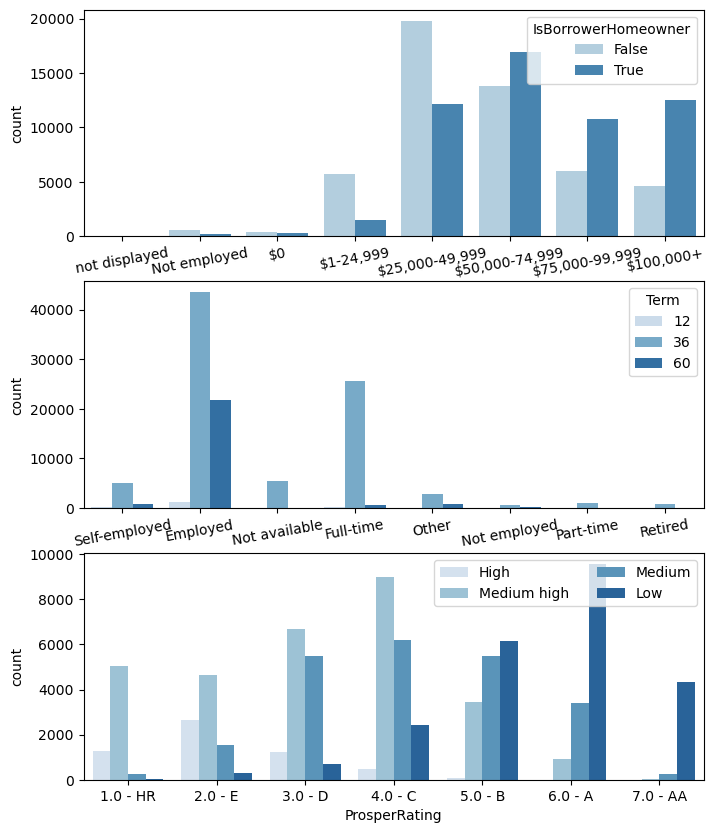

In [445]:
#further investigation into relationship between variables
plt.figure(figsize = [8, 10])
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
# subplot 1: Income Range vs Is BorrowerHomeowner
plt.subplot(3, 1, 1)
sns.countplot(data = df_sub, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order=order, palette = 'Blues')
plt.xticks(rotation=10)

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 2: ProsperRating vs. 'ProsperRiskLevel
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_sub, x = 'ProsperRating', hue = 'ProsperRiskLevel', palette = 'Blues')

ax.legend(loc = 1, ncol = 2); 

### Observation

 The results suggest that there is a correlation between income and homeowner status, with higher income borrowers more likely to own a home. Additionally, employed and full-time borrowers are more likely to take out loans with a term of 12 months. Finally, the Prosper rating is positively correlated with a low Prosper risk level, meaning that a lower risk level is associated with a better Prosper rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Based on the investigations, several relationships have been observed between different features in the dataset. The numerical variables show negative correlations between BorrowerAPR and BorrowerRate, LoanOriginalAmount and BorrowerAPR, and high correlation between Borrower Rate and Borrower APR. The income range of the borrower has a significant impact on the BorrowerAPR, BorrowerRate, and Debt-to-Income ratio, with higher income borrowers being eligible for lower borrowing costs and improved loan repayment prospects. The Prosper risk level affects the Loan Original Amount and Monthly Loan Payment, with high-risk borrowers taking out smaller loans and making low monthly payments. The Loan Original Amount has a strong relationship with the Monthly Loan Payment but little to no correlation with the Stated Monthly Income. The listing category may impact the lender yield and monthly loan payment, with certain categories resulting in lower yields and payments. The average loan original amount shows an upward trend over time with a slight dip during the 2008-2009 period. Borrowers with verified income tend to take out higher loan amounts than those with unverified income. The homeowner status, employment status, and Prosper rating are correlated with the income range and loan term/Prosper risk level, with higher income borrowers being more likely to own homes, employed and full-time borrowers taking out loans with a term of 12 months, and low-risk borrowers having better Prosper ratings.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, there were several interesting relationships observed between the other features in the dataset. Some of these include:<br>

(1). A strong correlation between BorrowerRate and BorrowerAPR, indicating that the higher the interest rate of the loan, the higher the annual percentage rate for that loan.<br>

(2). A negative correlation between LoanOriginalAmount and BorrowerAPR, meaning that the smaller the loan, the higher the interest rate, and the larger the loan, the lower the interest rate.<br>

(3). A relationship between the listing category and lender yield or monthly loan payment, where certain categories like business, debt consolidation, and large purchases result in lower lender yield and monthly loan payments.<br>

(4). A trend of increasing average loan original amount over time, with a slight dip observed during the 2008-2009 period, which may suggest a correlation with economic recessions during that time.<br>

(5). The average loan amount for borrowers with verified income is higher compared to those with unverified income.<br>

(6). Higher income borrowers are more likely to be homeowners, and employed and full-time borrowers are more likely to take out loans with a term of 12 months.<br>



## Multivariate Exploration


For this section i will be asking the following questions:<br>
(1).Whats the effect of the loan term on the relationship between the loan original amount and the borrower's annual percentage rate (APR)?<br>
(2).How does the relationship between multiple financial variables, such as credit score, debt-to-income ratio, and loan performance, impact loan outcomes?<br>
(3).How does the relationship between the loan original amount, monthly loan payment impact loan performance and default rate?<br>
(4).How does employment status and home ownership status impact the relationship between loan original amount and monthly loan payment?<br>


### (1). Whats the effect of the loan term on the relationship between the loan original amount and the borrower's annual percentage rate (APR)?

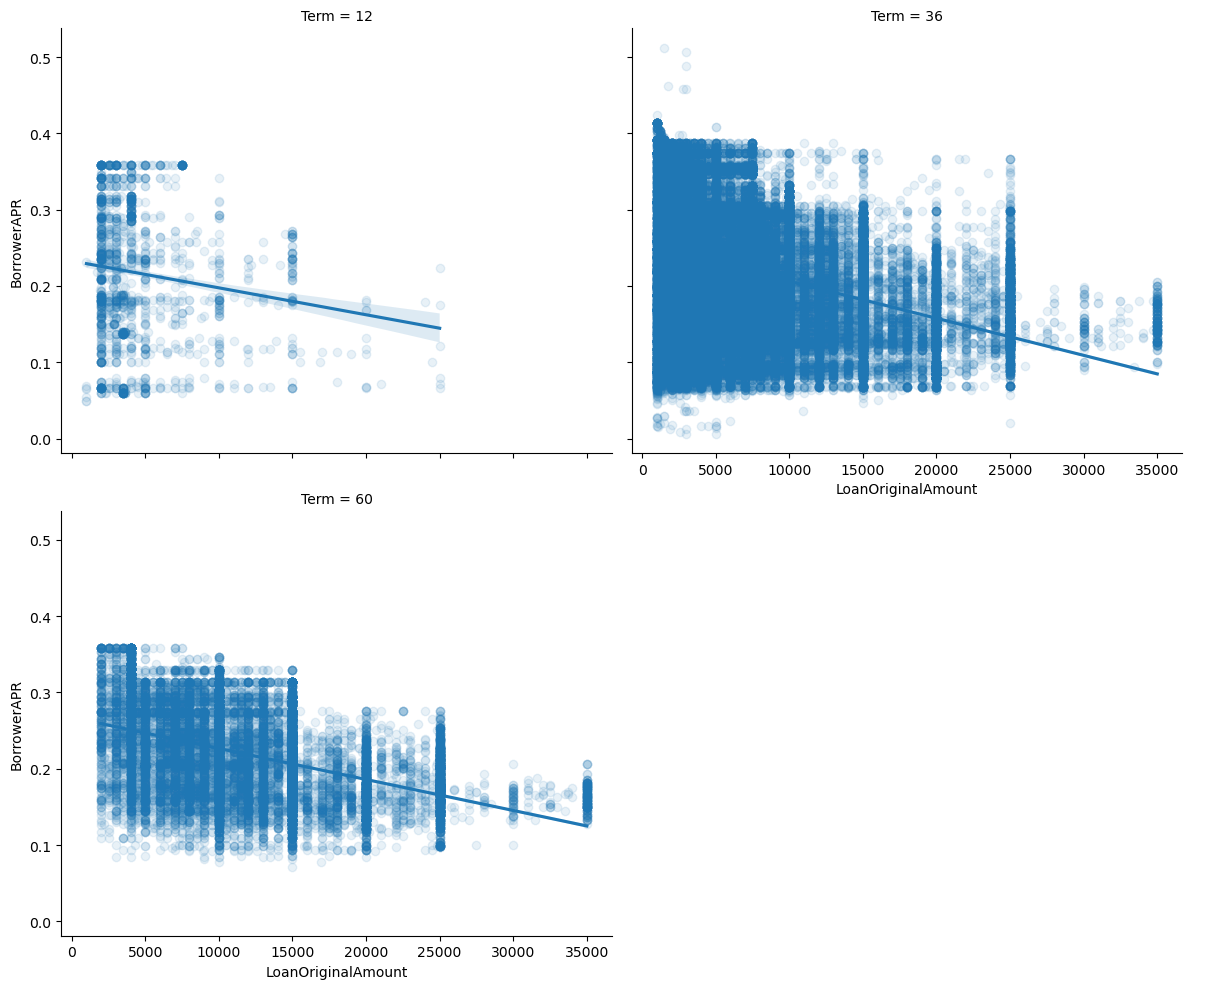

In [446]:
# Term effect on relationship of APR and loan amount
g=sns.FacetGrid(data=df_sub, aspect=1.2, height=5, col='Term', col_wrap=2)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

### Observation

Negative correlations between Loan Original Amount and Borrower APR indicates that, as the loan original amount increases, the Borrower APR decreases. This could mean that larger loans generally have lower interest rates, making them more attractive to borrowers. Additionally, it may indicate that lenders are more willing to offer lower interest rates for larger loans as they may view these loans as lower risk.

### (2).How does the relationship between multiple financial variables, such as credit score, debt-to-income ratio, and loan performance, impact loan outcomes?

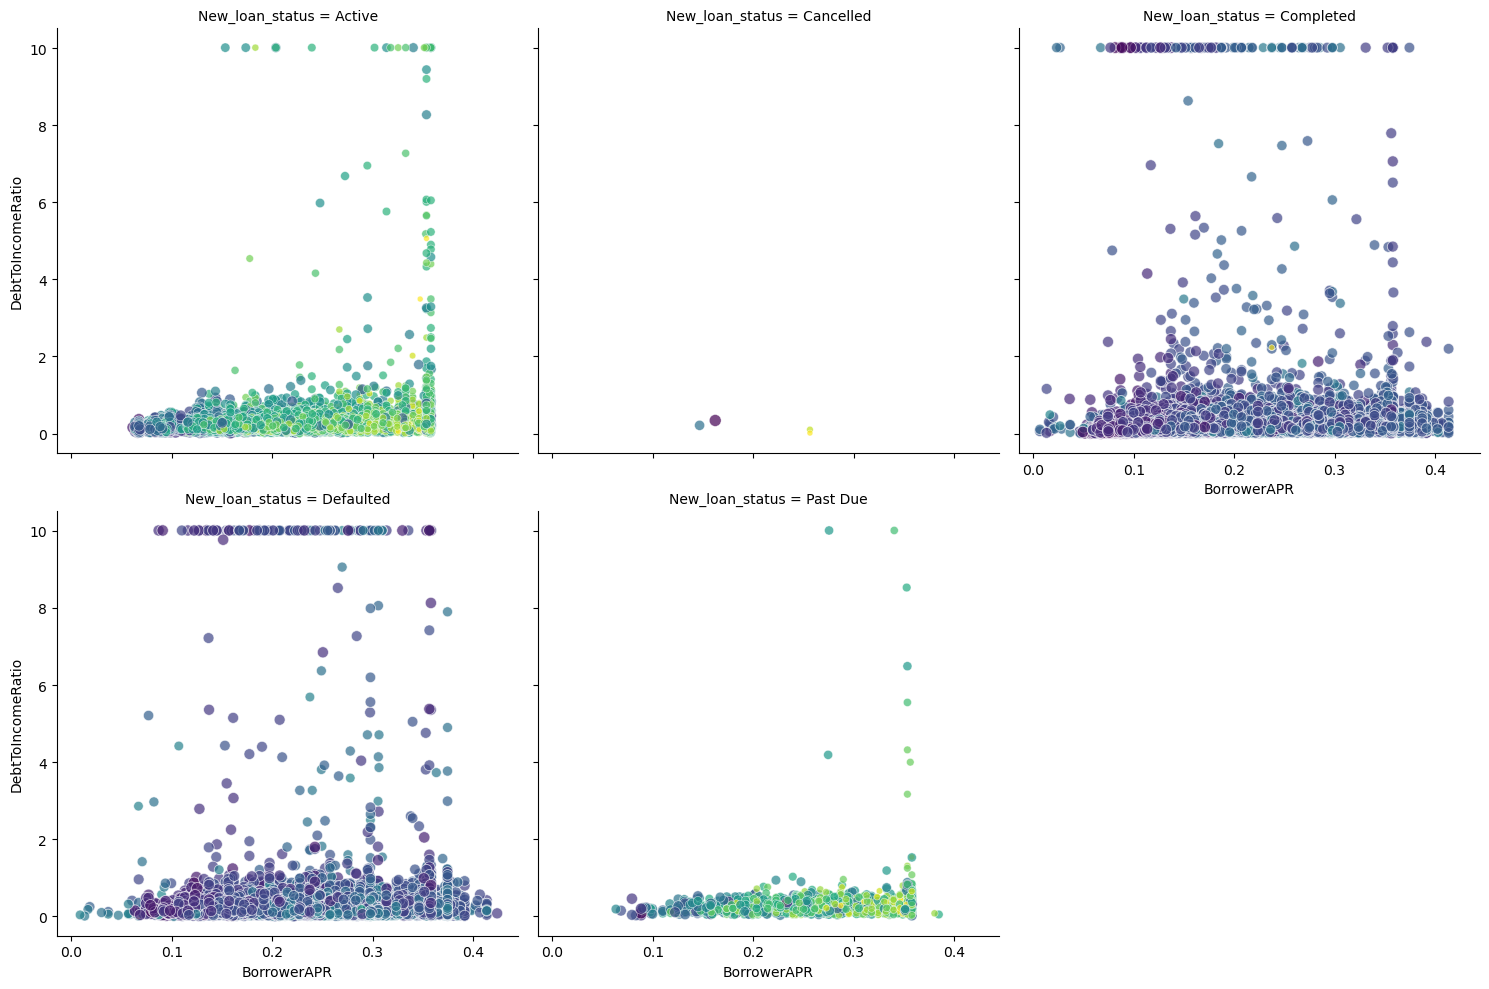

In [447]:


# Select relevant columns from the dataframe
sample = df_sub[['BorrowerAPR', 'DebtToIncomeRatio', 'CreditScoreRangeLower', 'New_loan_status']]

# Convert LoanStatus to a categorical variable
sample['New_loan_status'] = sample['New_loan_status'].astype('category')

# Create a facet grid plot
g = sns.FacetGrid(sample, col="New_loan_status", height=5,col_wrap=3)
g = g.map(sns.scatterplot, "BorrowerAPR", "DebtToIncomeRatio", "CreditScoreRangeLower", alpha=0.7,palette='viridis_r')

# Show the plot
plt.show()


### Observation

There is little to no relationship or correlation between the financial variables (BorrowerAPR, DebtToIncomeRatio, and CreditScoreRangeLower) and loan outcomes (New_loan_status) based on the scatter plots. The lack of a noticeable pattern in the scatter plots suggests that these financial variables may not have a significant impact on loan outcomes.

### (3). How does the relationship between the loan original amount, monthly loan payment impact loan performance and default rate?

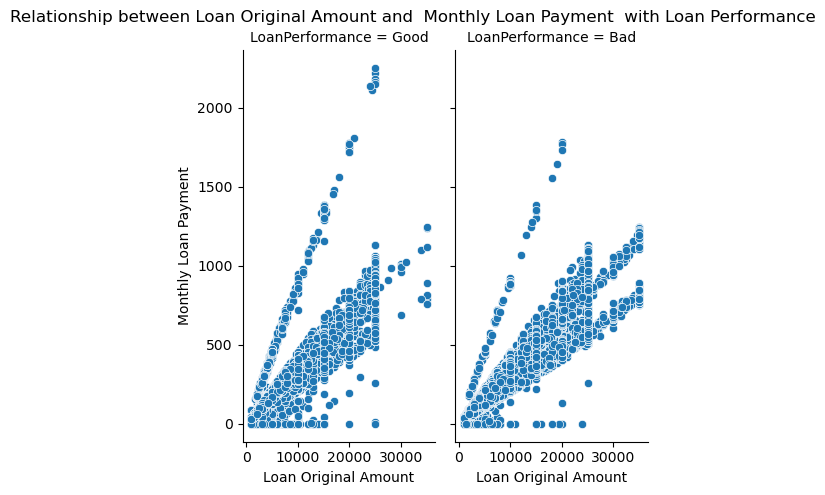

In [448]:


# Create a copy of the data
df_performace = df_sub.copy()

# Create a column to categorize loan performance and default rate
df_performace['LoanPerformance'] = df_sub['New_loan_status'].apply(lambda x: 'Good' if x in ['Current', 'Completed'] else 'Bad')

# Create a facet grid plot
g = sns.FacetGrid(df_performace, col='LoanPerformance', height=5, aspect=0.5,col_wrap=2,palette="coolwarm")
g = g.map(sns.scatterplot, 'LoanOriginalAmount', 'MonthlyLoanPayment')

g.set(xlabel='Loan Original Amount', ylabel='Monthly Loan Payment')
g.fig.subplots_adjust(top=0.9)
# Add the title to the plot
g.fig.suptitle("Relationship between Loan Original Amount and  Monthly Loan Payment  with Loan Performance")

# Show the plot
plt.show()


### Observation 

The positive correlations in the plots indicate that higher loan original amounts and monthly loan payments are associated with better loan performance (i.e., loans that are current or completed), while lower loan original amounts and monthly loan payments are associated with worse loan performance (i.e., loans that are charged off or defaulted). This suggests that borrowers who take out larger loans and can make higher monthly payments are more likely to repay their loans successfully, while those who take out smaller loans and have lower monthly payments are more likely to default or have trouble making their payments.

### (4).How does employment status and home ownership status impact the relationship between loan original amount and monthly loan payment?

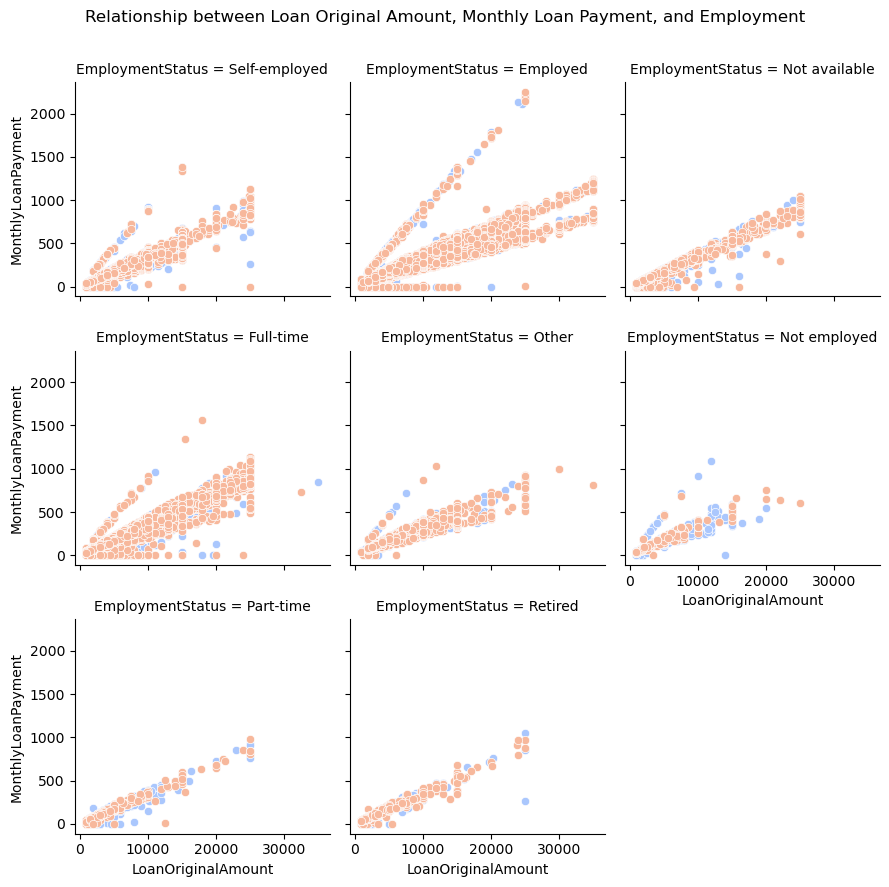

In [449]:

# create a facet grid plot with 3 rows and 1 column
g = sns.FacetGrid(df_sub, col='EmploymentStatus', hue='IsBorrowerHomeowner',col_wrap=3,palette="coolwarm")

# plot the scatterplot of loan original amount against monthly loan payment in each subplot
g = g.map(sns.scatterplot, 'LoanOriginalAmount', 'MonthlyLoanPayment')

# set the title for each subplot
g.fig.suptitle("Relationship between Loan Original Amount, Monthly Loan Payment, and Employment")

# adjust the title position to avoid overlap
plt.subplots_adjust(top=0.9)

# show the plot
plt.show()


### Observation

The positive correlations seen across the plots indicate that as the loan original amount increases, the monthly loan payment also tends to increase. This means that for borrowers who have different employment status and home ownership status, their loan payments are positively correlated with the size of the loan they originally took out.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The investigation provides insights into the relationships between different financial variables and loan outcomes. It was found that the loan term has a negative correlation with the loan original amount and the borrower's annual percentage rate (APR), indicating that larger loans generally have lower interest rates. The lack of a noticeable pattern between credit score, debt-to-income ratio, and loan performance suggests that these financial variables may not have a significant impact on loan outcomes. A positive correlation was found between the loan original amount, monthly loan payment, and loan performance, suggesting that borrowers who take out larger loans and can make higher monthly payments are more likely to repay their loans successfully. The employment status and home ownership status also seem to impact the relationship between loan original amount and monthly loan payment, with a positive correlation seen between the two variables.


### Were there any interesting or surprising interactions between features?

Yes. The negative correlation between loan original amount and the borrower's annual percentage rate (APR)

## Conclusions
In conclusion, the analysis of the loan data provided insights into various aspects of the loan market. The distributions of borrower APR, borrower rate, lender yield and estimated effective yield were found to have a symmetrical shape with spikes between 3.0-4.0 range. The homeowner status was found to impact loan performance as the most common loan status for homeowners was "Active," whereas non-homeowners had a higher number of "Defaulted" loans. The Loan Amount was found to be right-skewed, with most loans ranging between 1000-5000. Most loans were for a period of 36 months. There was a negative correlation between Loan Original Amount and Borrower APR and between Borrower Rate and Borrower APR. Borrower's income and borrowing costs or their ability to repay the loan was positively correlated. The Prosper Risk Level impacted Loan Original Amount and Monthly Loan Payment with higher risk levels resulting in lower loans and monthly payments. There was a strong relationship between Loan Original Amount and Monthly Loan Payment, but no correlation between Loan Original Amount and Stated Monthly Income. The average loan original amount showed an upward trend, with a slight dip during 2008-2009. Borrowers with verified income had higher loan amounts. Homeowner status, employment status, and Prosper rating were found to vary based on income range and loan term/Prosper risk level. The loan term had a negative impact on the relationship between Loan Original Amount and Borrower APR. Overall, the results provide a comprehensive picture of the loan market and the factors affecting it.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [452]:
df_sub.to_csv("loan_dataset.csv",index=False)